##MESSY FOOD PREDICTION##STEP 1: Data Cleaning

In [161]:
import pandas as pd

In [163]:
df_train = pd.read_csv(r"C:\SwattyConda\messy_food\train.csv")
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [164]:
df_test = pd.read_csv(r"C:\SwattyConda\messy_food\test.csv")
df_test.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [168]:
df_train.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

In [169]:
df_train.sample(100, random_state = 42)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
704,818,2023-05-12,147,18,15.976383,63.124162,4,0,41.924846,Intermediate,MeAt,34.490746
760,881,2023-07-18,164,18,16.634685,47.468655,1,1,26.541719,EXPERT,MEAT,38.151336
545,629,2024-06-26,339,7,18.494437,72.227539,2,0,19.219871,intermediate,Vegetables,33.296392
367,430,2022-05-16,326,5,30.536018,81.248160,0,0,12.743871,intermediate,Vegetables,30.037758
361,424,2023-12-14,157,6,22.209853,80.750973,3,0,24.169888,NaN,GRAINS,40.008565
...,...,...,...,...,...,...,...,...,...,...,...,...
569,658,2023-08-30,323,5,16.086949,48.115002,2,0,22.938912,Intermediate,Vegetables,42.117754
165,194,2022-02-14,406,10,19.295838,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759
136,155,2024-06-09,180,11,15.653676,66.328960,6,0,37.760552,Intermediate,MeAt,39.126079
682,795,2022-05-10,392,16,30.612851,67.351182,1,0,16.441755,Intermediate,GRAINS,37.443628


In [171]:
df_train.describe()

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,528.327113,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,305.072794,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,266.000000,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,531.000000,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,795.500000,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,1049.000000,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [173]:
df_train["staff_experience"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 911 entries, 0 to 910
Series name: staff_experience
Non-Null Count  Dtype 
--------------  ----- 
747 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [175]:
df_train["staff_experience"].unique()

array(['intermediate', nan, 'Beginner', 'Intermediate', 'EXPERT'],
      dtype=object)

In [177]:
df_train["staff_experience"].isna().sum()

164

In [180]:
df_test["staff_experience"].isna().sum()

164

In [182]:
df_train["staff_experience"].isna().mean()*100

18.00219538968167

In [183]:
#DROP ALL THE ROWS WITHOUT ANY PROPER RECORD
df_train = df_train.dropna(subset=["staff_experience"])

In [184]:
df_test = df_test.dropna(subset=["staff_experience"])

In [186]:
#CAPITALIZE THE STAFF EXPERIENCE COLUMN, SO IT CAN LOOK UNIFORM
df_train["staff_experience"] = df_train["staff_experience"].str.capitalize()

In [189]:
df_test["staff_experience"] = df_test["staff_experience"].str.capitalize()

In [191]:
df_train["staff_experience"].sample(20, random_state=42)

255    Intermediate
321          Expert
113        Beginner
188        Beginner
484    Intermediate
598        Beginner
289          Expert
225    Intermediate
645          Expert
448          Expert
322    Intermediate
449          Expert
641    Intermediate
485    Intermediate
431    Intermediate
91     Intermediate
741    Intermediate
512          Expert
218        Beginner
907    Intermediate
Name: staff_experience, dtype: object

In [193]:
df_test["staff_experience"].sample(20, random_state=42)

255    Intermediate
321          Expert
113        Beginner
188        Beginner
484    Intermediate
598        Beginner
289          Expert
225    Intermediate
645          Expert
448          Expert
322    Intermediate
449          Expert
641    Intermediate
485    Intermediate
431    Intermediate
91     Intermediate
741    Intermediate
512          Expert
218        Beginner
907    Intermediate
Name: staff_experience, dtype: object

In [194]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy,28.946465
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
5,7,2023-03-02,241,18,16.863506,79.285919,3,0,11.834878,Intermediate,dairy,27.393670


In [196]:
df_train["waste_category"].isna().sum()

0

In [197]:

df_train["waste_category"].unique()

array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS'], dtype=object)

In [199]:
#CAPITALIZE THE WASTE CATEGORY COLUMN, SO IT CAN LOOK UNIFORM
df_train["waste_category"] = df_train["waste_category"].str.capitalize()

In [200]:
df_test["waste_category"] = df_test["waste_category"].str.capitalize()

In [202]:
df_train["waste_category"].sample(20)

429        Grains
762        Grains
74           Meat
791          Meat
455         Dairy
909          Meat
755        Grains
711         Dairy
298    Vegetables
156         Dairy
672          Meat
825          Meat
11     Vegetables
457         Dairy
853          Meat
418         Dairy
843         Dairy
752          Meat
872          Meat
122        Grains
Name: waste_category, dtype: object

In [204]:
df_test["waste_category"].sample(20)


760          Meat
387    Vegetables
56           Meat
108          Meat
558         Dairy
388    Vegetables
334          Meat
908          Meat
211          Meat
842          Meat
129          Meat
756          Meat
116        Grains
873         Dairy
791          Meat
444         Dairy
568         Dairy
294          Meat
681    Vegetables
712         Dairy
Name: waste_category, dtype: object

In [205]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,Dairy,28.946465
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,Meat,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,Meat,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,Meat,44.156984
5,7,2023-03-02,241,18,16.863506,79.285919,3,0,11.834878,Intermediate,Dairy,27.393670


In [208]:
#CONVERT THE DATE COLUMN TO DATETIME INSTEAD OF LEAVING IT AS AN OBJECT TYPE.
df_train["date"] = pd.to_datetime(df_train["date"], errors="coerce")

In [211]:
df_train["date"].loc[747]

Timestamp('2023-11-30 00:00:00')

In [212]:
df_test["date"] = pd.to_datetime(df_test["date"], errors="coerce")

#STEP2: CHECK FOR OUTLIERS IN NUMERICAL COLUMNS#

In [215]:
df_train["temperature_C"].describe()

count    747.000000
mean      22.204227
std        9.159789
min      -10.372207
25%       15.690649
50%       22.079213
75%       28.863642
max       60.000000
Name: temperature_C, dtype: float64

In [218]:
import matplotlib.pyplot as plt

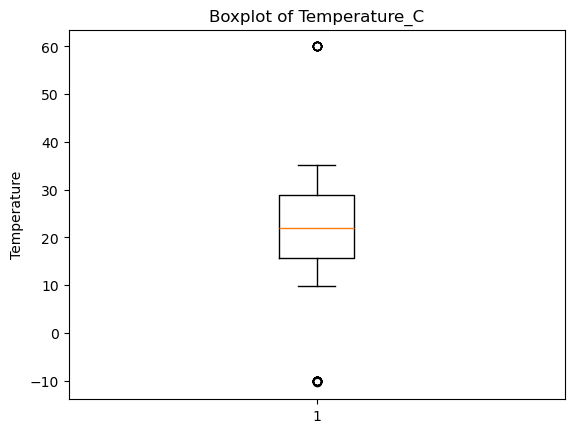

In [220]:
plt.boxplot(df_train["temperature_C"].dropna())
plt.title("Boxplot of Temperature_C")
plt.ylabel("Temperature")
plt.show()
           

In [222]:
#CHECK FOR OUTLIERS IN THE TEMPERATURE COLUMN
Q1 = df_train["temperature_C"].quantile(0.25)
Q3 = df_train["temperature_C"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df_train[
(df_train["temperature_C"]<lower_bound) |
(df_train["temperature_C"]>upper_bound)]

print(f"Number of Outliers:{len(outliers)}")
outliers.head()

Number of Outliers:21


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
12,15,2022-01-25,376,19,-10.372207,54.498381,1,0,36.259420,Expert,Meat,50.568699
102,115,2024-02-24,134,6,-10.000000,37.796482,5,0,49.359571,Beginner,Meat,36.163483
238,279,2023-03-06,453,5,-10.000000,57.790363,0,1,48.434434,Intermediate,Vegetables,71.752271
290,337,2022-08-28,259,9,60.000000,52.734617,6,0,49.281418,Beginner,Meat,44.955417
300,350,2023-03-07,421,18,60.000000,44.079207,1,0,24.268277,Intermediate,Meat,33.139494


In [224]:
#REMOVE ALL ROWS WITH OUTLIERS IN THE TEMPERATURE COLUMN
df_train = df_train[
(df_train["temperature_C"] >= lower_bound)&
(df_train["temperature_C"] <= upper_bound)
]

print("Outliers removed successfully")
print(f"Remaining rows: {len(df_train)}")

Outliers removed successfully
Remaining rows: 726


In [225]:
df_test["temperature_C"].describe()

count    747.000000
mean      22.204227
std        9.159789
min      -10.372207
25%       15.690649
50%       22.079213
75%       28.863642
max       60.000000
Name: temperature_C, dtype: float64

In [227]:
df_test = df_test[
(df_test["temperature_C"]>=lower_bound)&
(df_test["temperature_C"]<=upper_bound)
]
print(f"remaining rows: {len(df_test)}")

remaining rows: 726


In [229]:
df_train["meals_served"].describe()

count     726.000000
mean      392.826446
std       556.190089
min       100.000000
25%       213.000000
50%       306.000000
75%       408.500000
max      4730.000000
Name: meals_served, dtype: float64

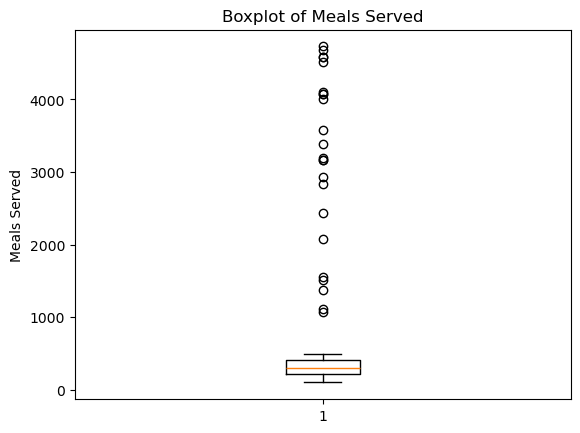

In [231]:
#BOX PLOT TO CHECK FOR OUTLIERS IN THE MEALS SERVED COLUMN
plt.boxplot(df_train["meals_served"].dropna())
plt.title("Boxplot of Meals Served")
plt.ylabel("Meals Served")
plt.show()

In [236]:
#CHECK FOR OUTLIERS LESS AND GREATER THAN THR 25% AND 75% PERCENTILE
Q1 = df_train["meals_served"].quantile(0.25)
Q3 = df_train["meals_served"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df_train[
(df_train["meals_served"]<lower_bound) |
(df_train["meals_served"]>upper_bound)
]

print(f"number of outliers:{len(outliers)}")

number of outliers:23


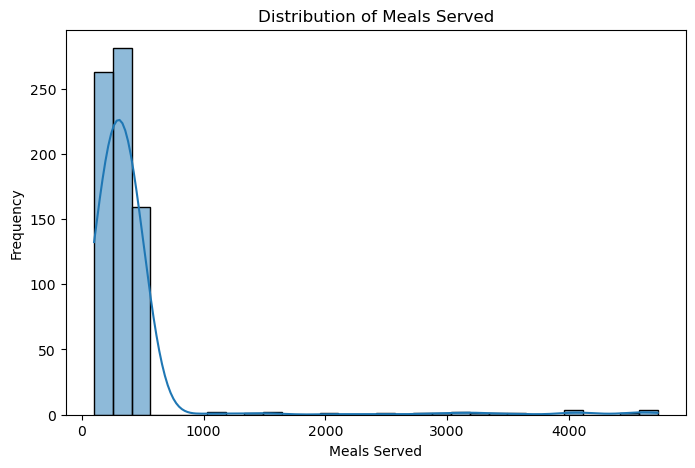

In [239]:
#HISTOGRAM PLOT OF HOW SKEWED THE MEALS SERVED COLUMN IS DUE TO THE OUTLIERS
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_train["meals_served"], bins=30, kde=True)
plt.title("Distribution of Meals Served")
plt.ylabel("Frequency")
plt.xlabel("Meals Served")
plt.show()

In [241]:
#REPLACE ALL OUTLIERS IN THE MEALS SERVED COLUMN WITH THE MEAN VALUE OF THE MEALS SERVED
mean_meals = df_train["meals_served"].mean()

df_train.loc[df_train["meals_served"]>500, "meals_served"]=mean_meals

print("Replaced all meals_served > 500 with mean value.")
print(df_train["meals_served"].describe())

Replaced all meals_served > 500 with mean value.
count    726.000000
mean     305.050976
std      111.686132
min      100.000000
25%      213.000000
50%      306.000000
75%      393.000000
max      499.000000
Name: meals_served, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_6736\1446468483.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '392.8264462809917' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train["meals_served"]>500, "meals_served"]=mean_meals


In [242]:
df_test.loc[df_test["meals_served"]>500, "meals_served"]=mean_meals
print(df_test["meals_served"].describe())

count    726.000000
mean     305.050976
std      111.686132
min      100.000000
25%      213.000000
50%      306.000000
75%      393.000000
max      499.000000
Name: meals_served, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_6736\4048731508.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '392.8264462809917' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test["meals_served"]>500, "meals_served"]=mean_meals


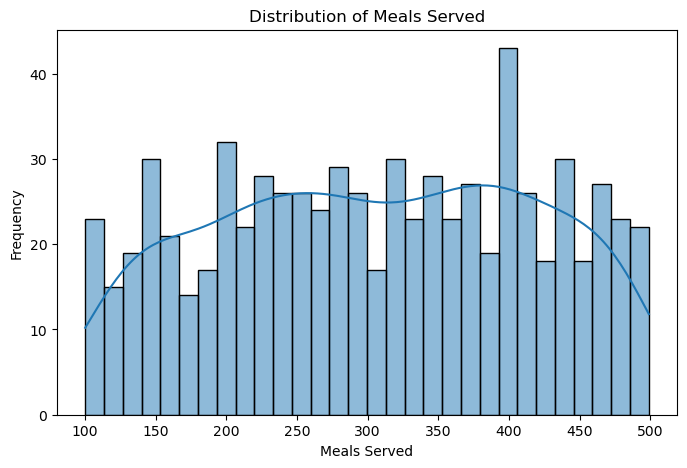

In [243]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["meals_served"], bins=30, kde=True)
plt.title("Distribution of Meals Served")
plt.xlabel("Meals Served")
plt.ylabel("Frequency")
plt.show()

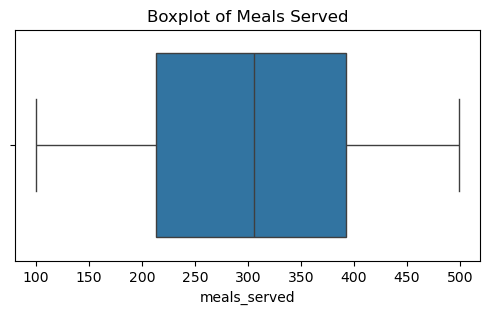

In [245]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_train["meals_served"])
plt.title("Boxplot of Meals Served")
plt.show()

In [248]:
#CHECK FOR OUTLIERS IN THE KITCHEN STAFF COLUMN
df_train["kitchen_staff"].describe()

count    726.000000
mean      11.902204
std        4.303336
min        5.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       19.000000
Name: kitchen_staff, dtype: float64

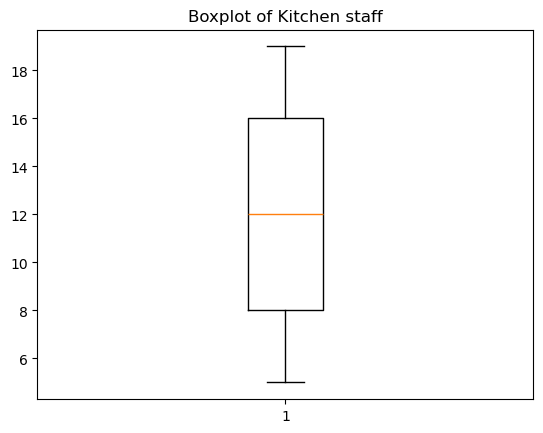

In [250]:
plt.boxplot(df_train["kitchen_staff"].dropna())
plt.title("Boxplot of Kitchen staff")
plt.show()

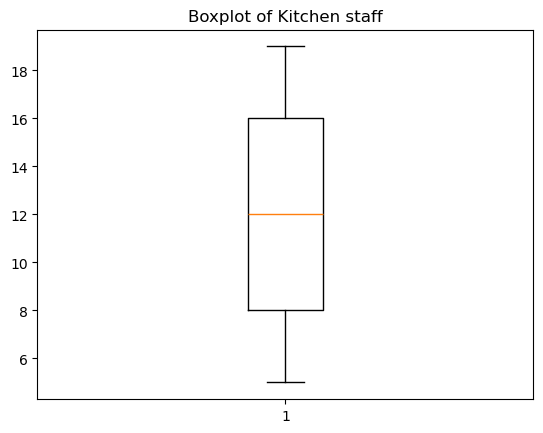

In [253]:
plt.boxplot(df_test["kitchen_staff"].dropna())
plt.title("Boxplot of Kitchen staff")
plt.show()

In [254]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,Intermediate,Dairy,28.946465
2,4,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,Meat,53.008323
3,5,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,Meat,48.621527
4,6,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,Meat,44.156984
5,7,2023-03-02,241.0,18,16.863506,79.285919,3,0,11.834878,Intermediate,Dairy,27.393670


In [256]:
df_train["humidity_percent"].describe()

count    726.000000
mean      60.456465
std       17.314916
min       30.121111
25%       45.977689
50%       61.267319
75%       75.198919
max       89.982828
Name: humidity_percent, dtype: float64

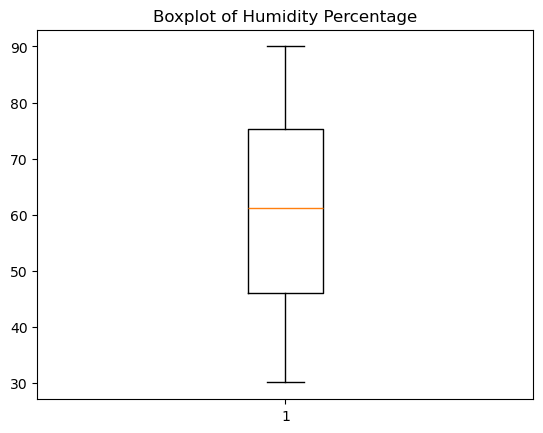

In [259]:
plt.boxplot(df_test["humidity_percent"])
plt.title("Boxplot of Humidity Percentage")
plt.show()

In [262]:
df_train["day_of_week"].describe()

count    726.000000
mean       2.984848
std        2.013346
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: day_of_week, dtype: float64

In [264]:
df_train['special_event'].describe()

count    726.000000
mean       0.085399
std        0.279668
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: special_event, dtype: float64

In [266]:
df_train["past_waste_kg"].describe()

count    726.000000
mean      26.964614
std       12.837211
min        5.041824
25%       15.990760
50%       26.832569
75%       38.240785
max       49.796337
Name: past_waste_kg, dtype: float64

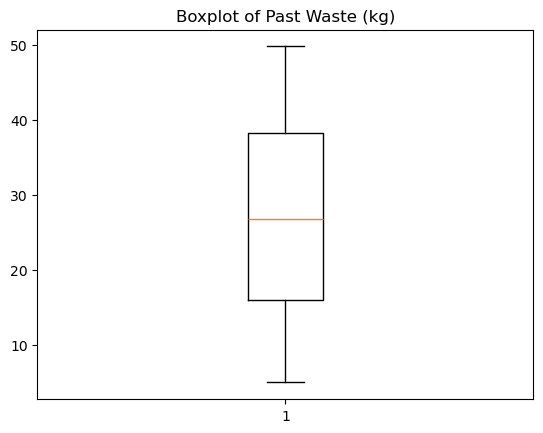

In [268]:
plt.boxplot(df_train["past_waste_kg"])
plt.title("Boxplot of Past Waste (kg)")
plt.show()

In [270]:
df_train["food_waste_kg"].describe()

count    726.000000
mean      45.647256
std       29.640847
min       11.181282
25%       33.249546
50%       41.245989
75%       50.204939
max      274.328783
Name: food_waste_kg, dtype: float64

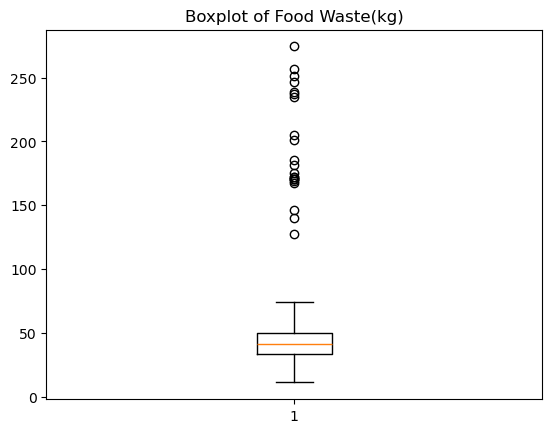

In [272]:
#CHECK FOR OUTLIERS IN THE FOOD WASTE COLUMN USING A BOX PLOT
plt.boxplot(df_train["food_waste_kg"])
plt.title("Boxplot of Food Waste(kg)")
plt.show()

In [274]:
Q1 = df_train["food_waste_kg"].quantile(0.25)
Q3 = df_train["food_waste_kg"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Limit:", lower_bound)
print("Upper Limit:", upper_bound)

Lower Limit: 7.816454585241175
Upper Limit: 75.63803040685237


In [276]:
#REPLACE ALL OUTLIERS LESS THAN 25% AND GREATER THAN THE 75% WITH THE MEDIAN VAUE OF THE FOOD WASTE COLUMN
median_food_waste = df_train["food_waste_kg"].median()

df_train.loc[
(df_train["food_waste_kg"]< lower_bound) | (df_train["food_waste_kg"]> upper_bound),
"food_waste_kg"
] = median_food_waste

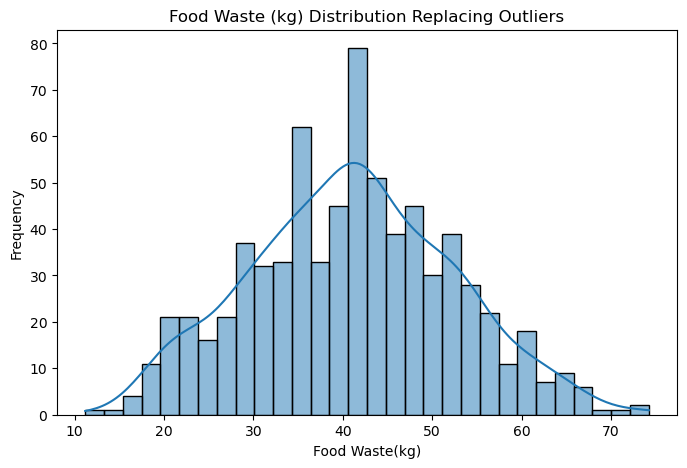

In [278]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["food_waste_kg"], bins =30, kde=True)
plt.title("Food Waste (kg) Distribution Replacing Outliers")
plt.xlabel("Food Waste(kg)")
plt.ylabel("Frequency")
plt.show()

###STEP3: EXPLORATORY DATA ANALYSIS###

In [281]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,Intermediate,Dairy,28.946465
2,4,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,Meat,53.008323
3,5,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,Meat,48.621527
4,6,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,Meat,44.156984
5,7,2023-03-02,241.0,18,16.863506,79.285919,3,0,11.834878,Intermediate,Dairy,27.393670


In [283]:
df_train.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
dtype: int64

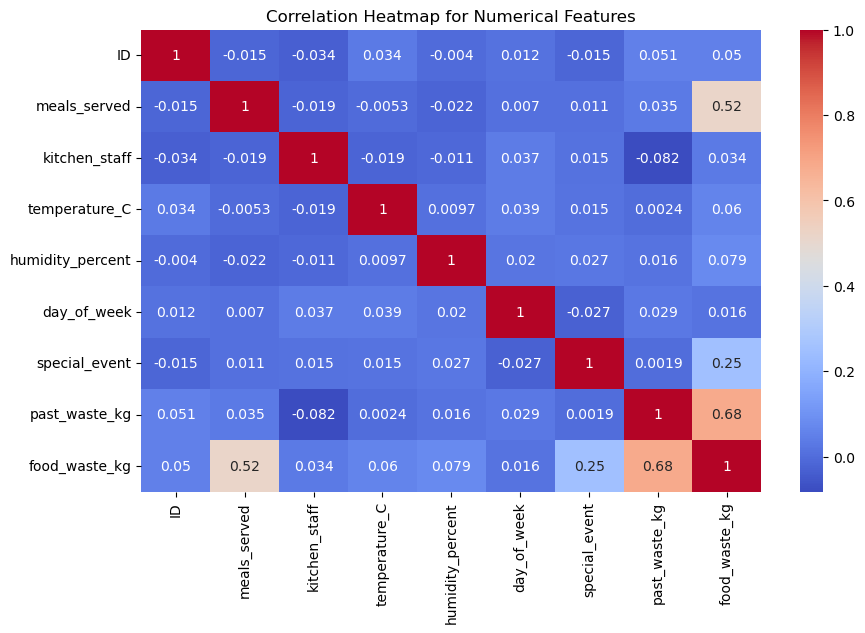

In [285]:
#COORELATION HEATMAP SHOWING RELATIONSHIP BETWEEN NUMERICAL FEATURES
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Features")
#plt.show()
plt.savefig("correlation heatmap for numeric features.jpg", dpi=300, bbox_inches="tight")

In [286]:
import os
os.getcwd()

'C:\\Users\\hp'

In [287]:
# FEATURE ENGINEERING ON THE DATE COLUMN
df_train["year"] = df_train["date"].dt.year

df_train["month"] = df_train["date"].dt.month

print(df_train["month"].value_counts())

month
1     79
5     72
2     69
3     69
6     68
7     64
8     63
4     58
9     52
10    47
11    43
12    42
Name: count, dtype: int64


In [288]:
df_test["year"] = df_test["date"].dt.year

df_test["month"] = df_test["date"].dt.month

print(df_test["month"].value_counts())

month
1     79
5     72
2     69
3     69
6     68
7     64
8     63
4     58
9     52
10    47
11    43
12    42
Name: count, dtype: int64


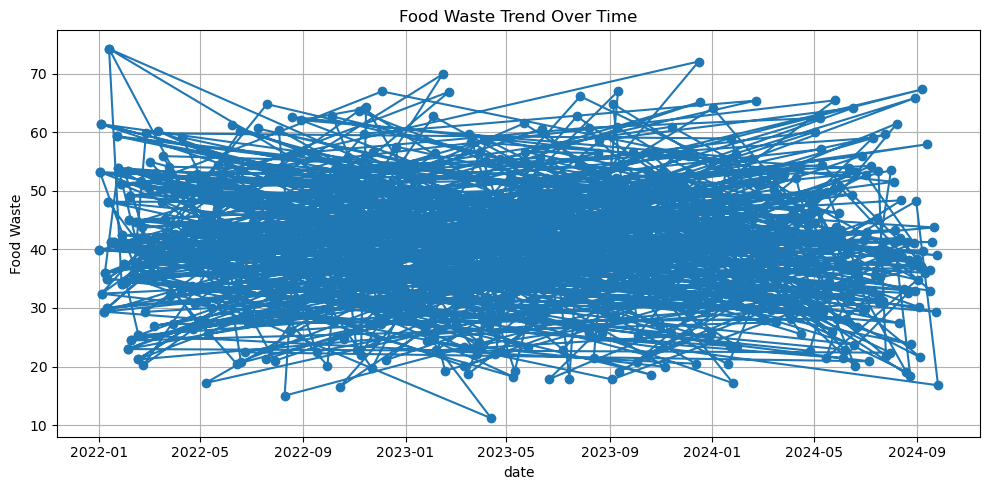

In [289]:
# PLOT TO SHOW THE FOOD WASTE TREND OVER TIME
plt.figure(figsize=(10, 5))
plt.plot(df_train["date"], df_train["food_waste_kg"], marker="o")
plt.title("Food Waste Trend Over Time")
plt.xlabel("date")
plt.ylabel("Food Waste")
plt.grid(True)
plt.tight_layout()
plt.show()

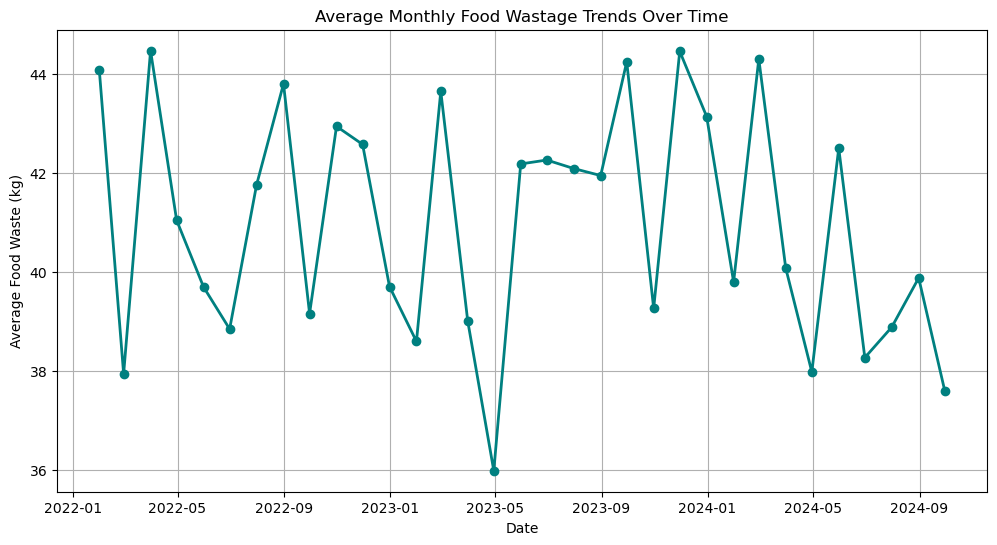

In [292]:
#PLOT TO SHOW THE AVERAGE MONTHLY FOOD WASTE TREND OVER TIME
df_trend = df_train.set_index('date').resample('ME')['food_waste_kg'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_trend.index, df_trend.values, color='teal', linewidth=2, marker='o')
plt.title("Average Monthly Food Wastage Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Food Waste (kg)")
plt.grid(True)
#plt.show()
plt.savefig("Average Monthly Food Waste TRends over Time.jpg", dpi=300, bbox_inches="tight")

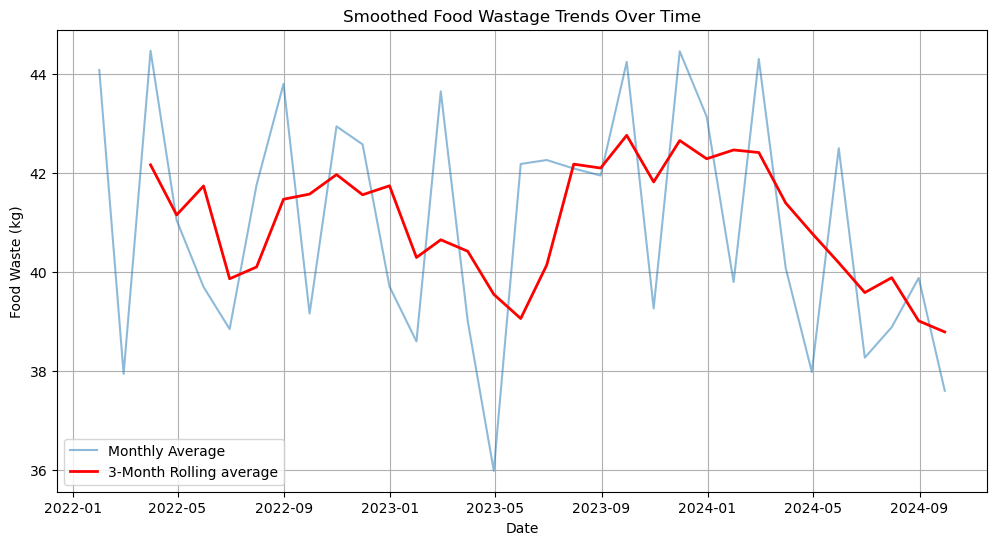

In [295]:
df_trend_rolling = df_trend.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_trend.index, df_trend.values, label='Monthly Average', alpha=0.5)
plt.plot(df_trend_rolling.index, df_trend_rolling.values, color='red', linewidth=2, label = '3-Month Rolling average' )
plt.title("Smoothed Food Wastage Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Food Waste (kg)")
plt.grid(True)
plt.legend()
plt.show()

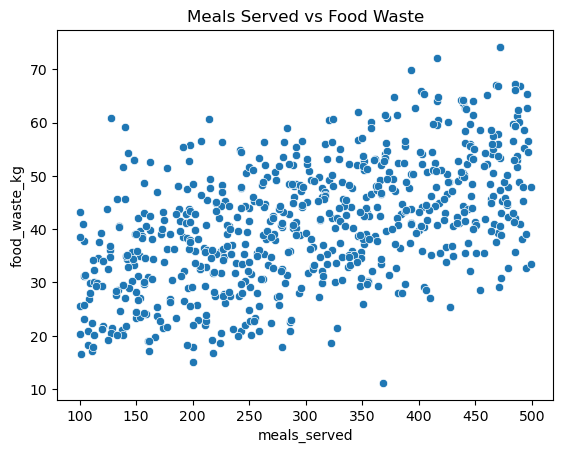

In [296]:
#SCATTERED PLOT SHOWING THE RELATIONSHIP OF MEALS SERVED TO FOOD WASTE
sns.scatterplot(x="meals_served", y="food_waste_kg", data=df_train)
plt.title("Meals Served vs Food Waste")
plt.show()

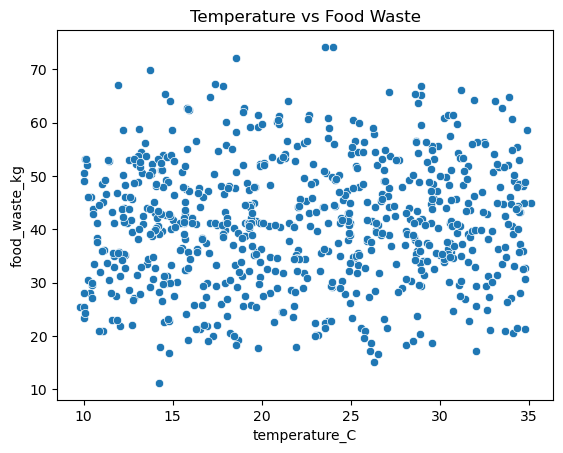

In [297]:
sns.scatterplot(x="temperature_C", y="food_waste_kg", data=df_train)
plt.title("Temperature vs Food Waste")
plt.show()

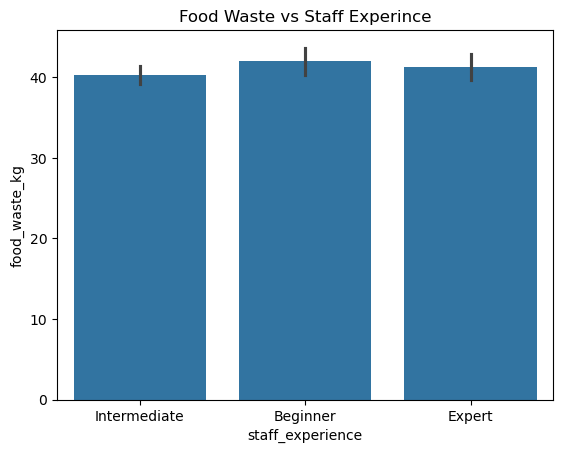

In [299]:
#BAR CHART SHOWING THE RELATIONSHIP BETWEEN FOOD WASTE TO STAFF EXPERIENCE
sns.barplot(x="staff_experience", y="food_waste_kg", data=df_train)
plt.title("Food Waste vs Staff Experince")
plt.show()

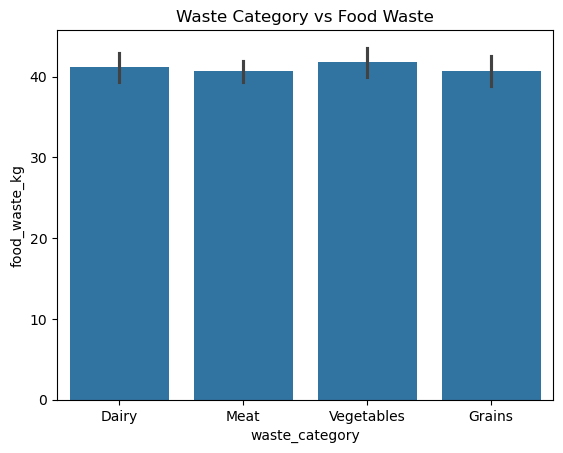

In [300]:
sns.barplot(x="waste_category", y="food_waste_kg", data=df_train)
plt.title("Waste Category vs Food Waste")
plt.show()

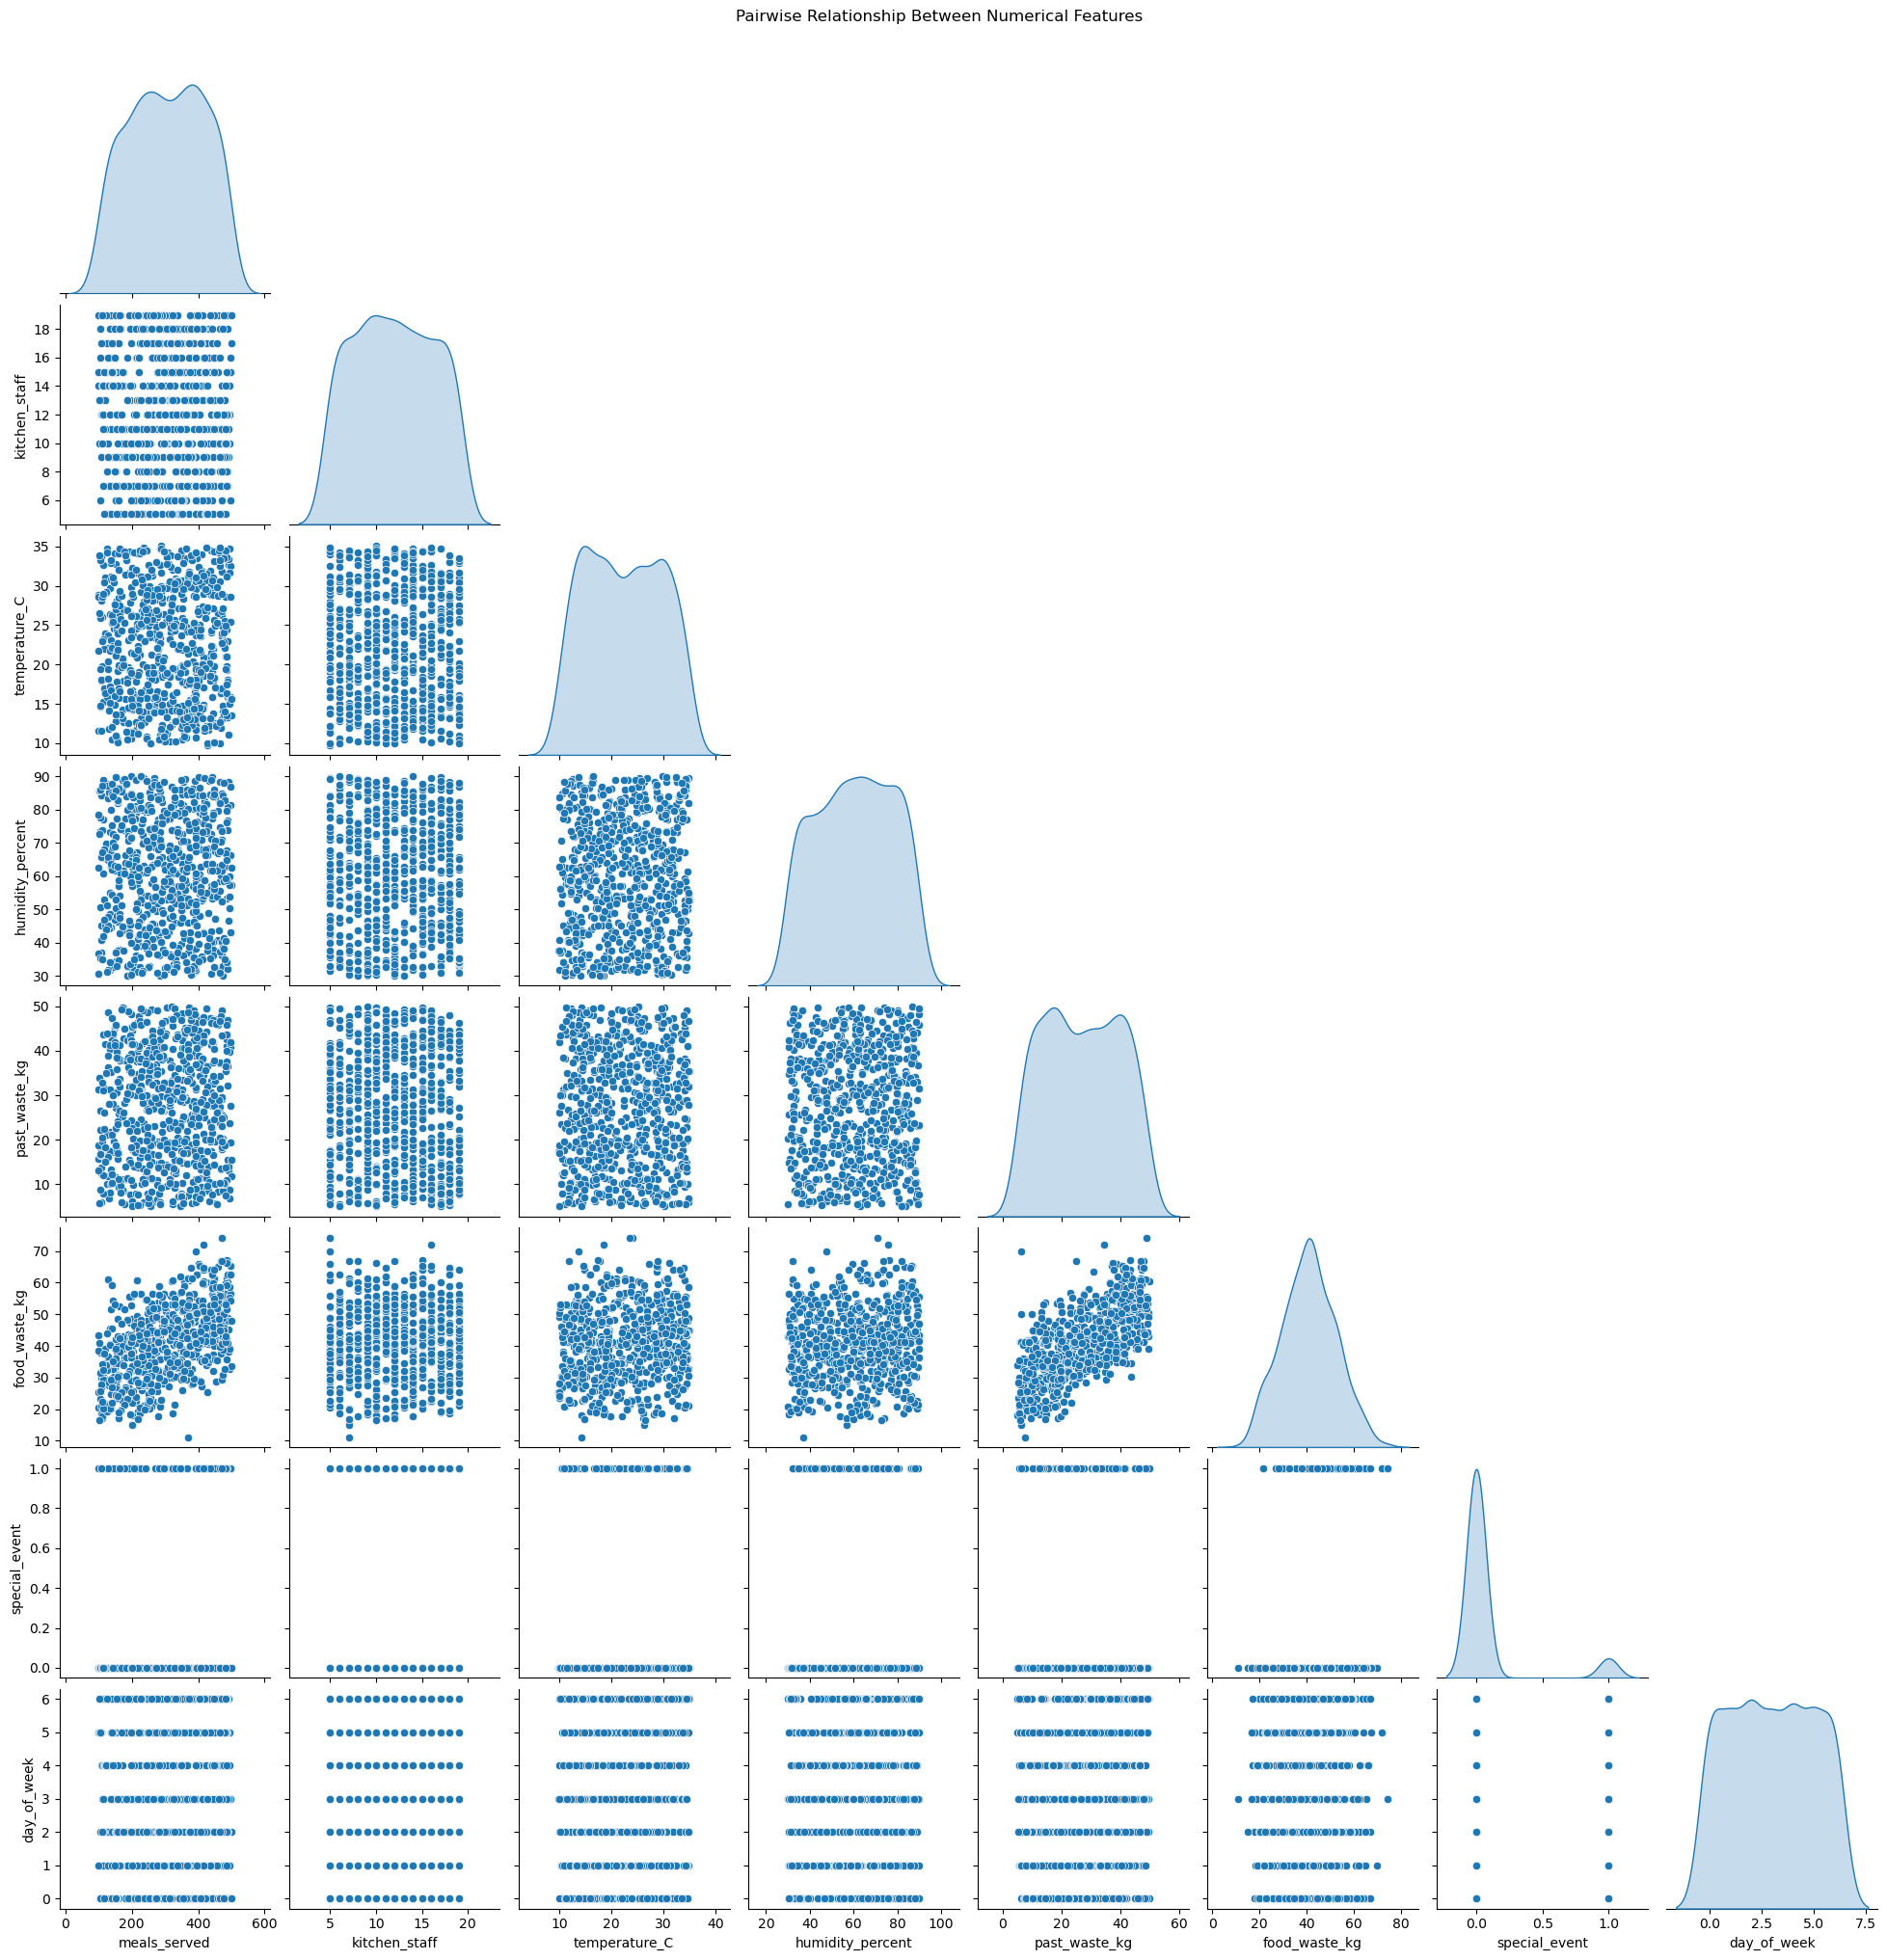

In [301]:
#PAIRPLOT OF ALL NUMERICAL COLUMNS
num_cols = ['meals_served','kitchen_staff','temperature_C','humidity_percent','past_waste_kg','food_waste_kg', 'special_event', 'day_of_week']
sns.pairplot(df_train[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationship Between Numerical Features", y=1.02)
#plt.show()
plt.savefig("Pairplot relationship of numerical features.jpg", dpi=300, bbox_inches="tight")

In [303]:
#CODING OF ALL CATEGORICAL COLUMNS USING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['staff_experience'] = le.fit_transform(df_train['staff_experience'])

In [305]:
df_test['staff_experience'] = le.fit_transform(df_test['staff_experience'])


In [307]:
df_train.sample(20)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,year,month
787,915,2022-02-17,428.0,5,10.025737,37.647238,3,0,17.503032,2,Dairy,25.346540,2022,2
836,968,2024-05-12,211.0,11,32.053390,50.007756,6,0,18.782055,2,Dairy,29.372179,2024,5
430,504,2023-01-03,472.0,11,26.752401,61.714687,1,1,18.308640,1,Meat,53.282167,2023,1
126,144,2022-01-28,121.0,19,29.076916,43.965789,4,0,34.997769,0,Dairy,34.040727,2022,1
101,114,2023-10-19,497.0,15,32.472521,81.312419,3,0,27.610954,0,Meat,56.471270,2023,10
831,963,2023-12-28,157.0,14,23.951058,82.769794,3,0,23.589833,0,Meat,30.119157,2023,12
686,799,2024-04-10,301.0,18,10.175730,37.109542,2,0,43.499801,1,Vegetables,52.159464,2024,4
851,986,2023-07-16,367.0,10,11.865745,79.785787,6,1,21.938673,2,Grains,46.741257,2023,7
810,941,2022-02-01,148.0,16,27.569760,69.046113,1,0,41.184305,0,Meat,53.008323,2022,2
302,353,2023-04-24,157.0,7,10.500659,37.776039,0,1,15.603028,0,Grains,29.628702,2023,4


In [309]:
df_test

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,year,month
0,0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,2,Dairy,2022,12
2,4,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,0,Meat,2022,2
3,5,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,0,Meat,2023,3
4,6,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,2,Meat,2022,7
5,7,2023-03-02,241.0,18,16.863506,79.285919,3,0,11.834878,2,Dairy,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395.0,18,17.354199,45.138435,1,0,40.550668,2,Grains,2022,3
907,1045,2022-11-27,483.0,11,24.912137,59.485091,6,0,36.470276,2,Dairy,2022,11
908,1046,2023-04-12,243.0,11,28.870945,70.508404,2,0,19.767203,2,Meat,2023,4
909,1048,2022-02-14,406.0,10,19.061638,55.286642,0,0,28.560361,1,Meat,2022,2


In [311]:
df_train['waste_category'] = le.fit_transform(df_train['waste_category'])
df_test['waste_category'] = le.fit_transform(df_test['waste_category'])

In [312]:
df_train

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,year,month
0,0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,2,0,28.946465,2022,12
2,4,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,0,2,53.008323,2022,2
3,5,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,0,2,48.621527,2023,3
4,6,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,2,2,44.156984,2022,7
5,7,2023-03-02,241.0,18,16.863506,79.285919,3,0,11.834878,2,0,27.393670,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395.0,18,17.354199,45.138435,1,0,40.550668,2,1,50.369152,2022,3
907,1045,2022-11-27,483.0,11,24.912137,59.485091,6,0,36.470276,2,0,43.070121,2022,11
908,1046,2023-04-12,243.0,11,28.870945,70.508404,2,0,19.767203,2,2,29.632560,2023,4
909,1048,2022-02-14,406.0,10,19.061638,55.286642,0,0,28.560361,1,2,44.615759,2022,2


In [314]:
#FEATURE ENGINEERING: Creating new columns to better predict food wastage.
import numpy as np

In [315]:
df_train['meals_per_staff'] = df_train['meals_served'] / df_train['kitchen_staff'].replace(0, np.nan)

df_test['meals_per_staff'] = df_test['meals_served'] / df_test['kitchen_staff'].replace(0, np.nan)


In [316]:
df_train[['meals_per_staff', 'food_waste_kg']].corr()

,meals_per_staff,food_waste_kg
meals_per_staff,1.000000,0.291047
food_waste_kg,0.291047,1.000000


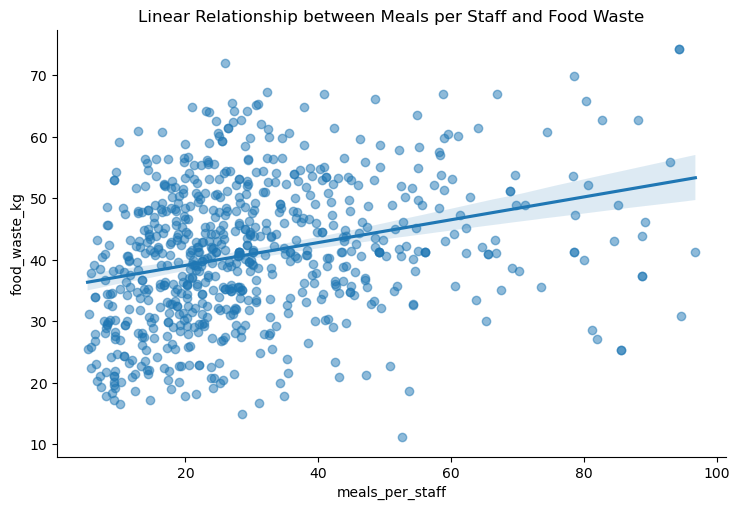

In [317]:
sns.lmplot(x='meals_per_staff', y='food_waste_kg', data=df_train, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Linear Relationship between Meals per Staff and Food Waste")
plt.show()

In [318]:
df_train['humidity_temp_interaction'] = df_train['humidity_percent'] * df_train['temperature_C']
df_test['humidity_temp_interaction'] = df_test['humidity_percent'] * df_test['temperature_C']

In [319]:
df_train[['humidity_temp_interaction', 'food_waste_kg']].corr()

,humidity_temp_interaction,food_waste_kg
humidity_temp_interaction,1.000000,0.103441
food_waste_kg,0.103441,1.000000


In [320]:
df_train['dayofweek'] = df_train['date'].dt.day_name()
df_train['is_weekend'] = df_train['dayofweek'].isin(['Saturday', 'Sunday']).astype(int)

In [321]:
df_test['dayofweek'] = df_test['date'].dt.day_name()
df_test['is_weekend'] = df_test['dayofweek'].isin(['Saturday', 'Sunday']).astype(int)

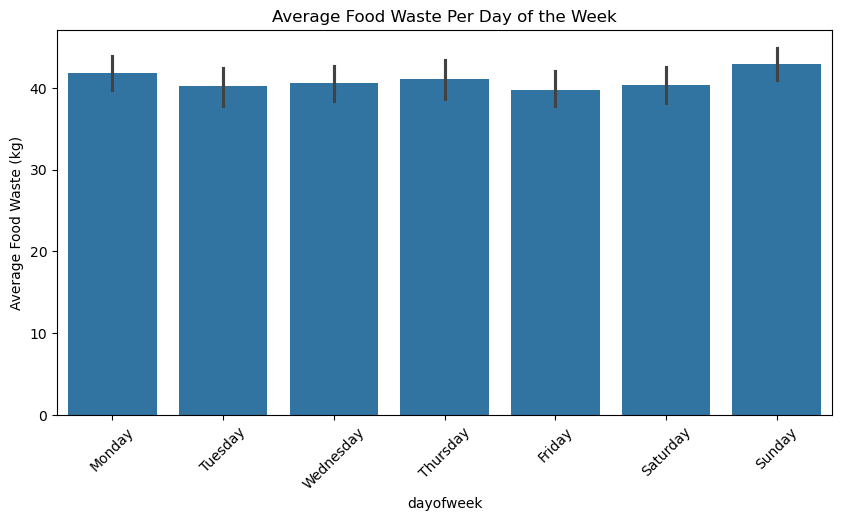

In [322]:
plt.figure(figsize=(10,5))
sns.barplot(x='dayofweek', y='food_waste_kg', data=df_train, estimator='mean', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Food Waste Per Day of the Week')
plt.ylabel('Average Food Waste (kg)')
plt.xticks(rotation=45)
plt.show()

In [323]:
df_train[['month', 'is_weekend', 'food_waste_kg']].corr()

,month,is_weekend,food_waste_kg
month,1.000000,-0.013298,0.025545
is_weekend,-0.013298,1.000000,0.037886
food_waste_kg,0.025545,0.037886,1.000000


In [324]:
df_train

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,year,month,meals_per_staff,humidity_temp_interaction,dayofweek,is_weekend
0,0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,2,0,28.946465,2022,12,15.076923,1265.046276,Monday,0
2,4,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,0,2,53.008323,2022,2,9.250000,1913.564693,Tuesday,0
3,5,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,0,2,48.621527,2023,3,8.263158,887.614048,Sunday,1
4,6,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,2,2,44.156984,2022,7,29.700000,2103.189179,Monday,0
5,7,2023-03-02,241.0,18,16.863506,79.285919,3,0,11.834878,2,0,27.393670,2023,3,13.388889,1337.038607,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395.0,18,17.354199,45.138435,1,0,40.550668,2,1,50.369152,2022,3,21.944444,783.341398,Tuesday,0
907,1045,2022-11-27,483.0,11,24.912137,59.485091,6,0,36.470276,2,0,43.070121,2022,11,43.909091,1481.900720,Sunday,1
908,1046,2023-04-12,243.0,11,28.870945,70.508404,2,0,19.767203,2,2,29.632560,2023,4,22.090909,2035.644280,Wednesday,0
909,1048,2022-02-14,406.0,10,19.061638,55.286642,0,0,28.560361,1,2,44.615759,2022,2,40.600000,1053.853946,Monday,0


In [325]:
df_train['dayofweek'] = le.fit_transform(df_train['dayofweek'])
df_test['dayofweek'] = le.fit_transform(df_test['dayofweek'])

### MACHINE LEARNING###

In [327]:
X_train = df_train.drop(columns=['food_waste_kg', 'date', 'dayofweek', 'ID'], axis=1, errors='ignore')
y_train = df_train['food_waste_kg']

X_test = df_test.drop(columns=['date', 'dayofweek', 'ID'], errors='ignore')

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

In [329]:
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(random_state=42),
    "Gradient_Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

In [330]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)

    results.append({
        "Model":name,
        "Train R2": r2_score(y_train, y_pred),
        "Test R2": r2_score(y_test, y_val_pred) if "y_test" in locals() else None,
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred)),
        "MAE": mean_absolute_error(y_train, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Train R2,Test R2,RMSE,MAE
0,Linear_Regression,0.791369,None,5.184947,4.055220
1,Random_Forest,0.965754,None,2.100690,1.577165
2,Gradient_Boosting,0.905092,None,3.497081,2.790405


In [331]:
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

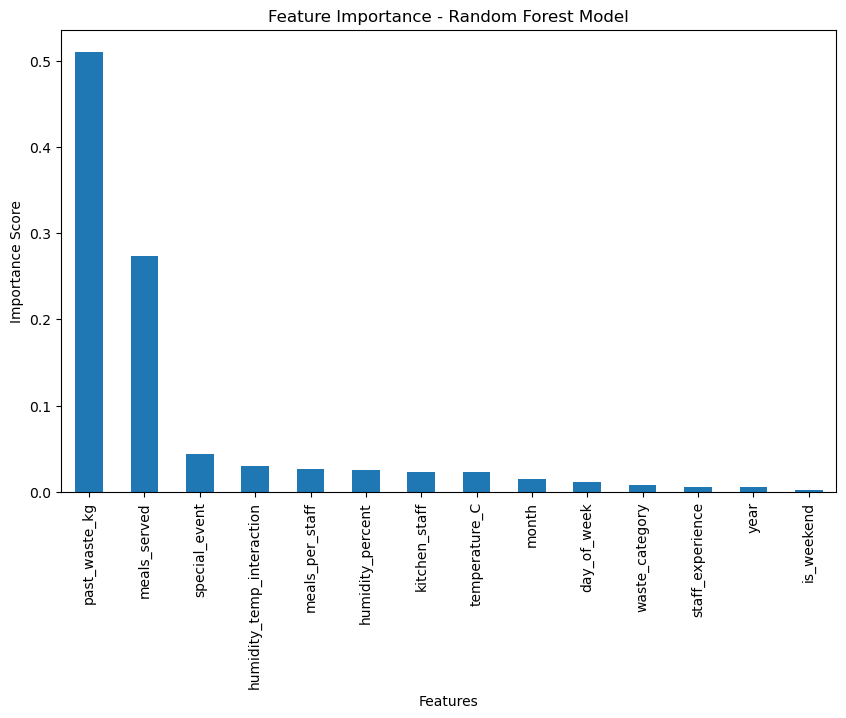

In [332]:
feature_importances = pd.Series(model_random_forest.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importances.plot(kind="bar")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
#plt.show()
plt.savefig("Feature importances of random forest model.jpg", dpi=300, bbox_inches="tight", transparent=True)